In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

In [2]:
# # gw50m
# altitude = 50
# answer_location = (52.53962045830213, 13.419884901364885, 50)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
# d = []
# # rssi to distance with curve fit
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

# gw100m
altitude = 100
answer_location = (52.53962045830213, 13.419884901364885, 100)
source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
d = []
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)

# # gw100m_nobuilding
# altitude = 100
# answer_location = (52.53962045830213, 13.419884901364885, 200)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.58976692127023, -66.84978429622258, -65.43775615882458, -68.51723739248007, -69.34638664552159, -70.67158737502467, -69.47921756875596, -69.74188545126589, -71.33057463016215, -63.86118311152556])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

[511.8755465287958, 234.89856649485617, 197.5557485663918, 410.50477950801775, 305.73897592295174, 354.46186954189903, 295.9958660450461, 327.19722509936946, 394.29288508294167, 163.11736949587115]


In [3]:
[490.9845858372635, 239.1658724664293, 197.06693373599455, 269.9714723370692, 299.17153956786615, 352.6494853812043, 303.1263591036511, 324.5792879614826, 385.8966341254787, 162.56495453832926]

[490.9845858372635,
 239.1658724664293,
 197.06693373599455,
 269.9714723370692,
 299.17153956786615,
 352.6494853812043,
 303.1263591036511,
 324.5792879614826,
 385.8966341254787,
 162.56495453832926]

Receiver location: (52.53970707346324, 13.419454055588638, 99.99999999720603)
error to the truth in 3d 30.780935566864557
error to the truth in 2d 30.772481736140172
[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]


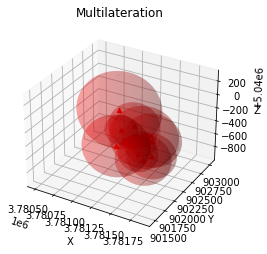

[  4.75145171  11.61229529   5.06896714 111.6741807   19.2677735
  26.53846226  13.8576484   15.29709362  38.21703652  19.93368663]


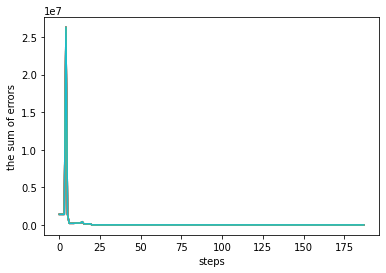

In [4]:
# multilateration program

errors_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    errors_array.append(np.sqrt(errors**2))
    return np.sum(errors**2)

# Constraint function to ensure the estimated location has the same altitude as the wanted location
def altitude_constraint(xyz_receiver_estimated, altitude):
    lat, lon, alt = to_gps(*xyz_receiver_estimated)
    x, y, z = to_cartesian(lat, lon, altitude)
    return xyz_receiver_estimated[2] - z

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

# Starting GPS coordinates of the receiver (can be anywhere)
receiver_location = (40.048174, 10.134445, 0)

# Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
xyz_receiver = np.array(to_cartesian(*receiver_location))

# Perform multilateration to estimate the location of the receiver
result = minimize(error, xyz_receiver, args=(xyz_sources, d), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
xyz_receiver_estimated = result.x

# Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
receiver_location_estimated = to_gps(*xyz_receiver_estimated)

print('Receiver location:', receiver_location_estimated)
print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))


# Plot the sources and the estimated location of the receiver
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sources
for i in range(len(source_locations)):
    x, y, z = to_cartesian(*source_locations[i])
    ax.scatter(x, y, z, color='r', marker='^')

# Plot the estimated location of the receiver
x, y, z = to_cartesian(*receiver_location_estimated)
ax.scatter(x, y, z, color='b', marker='o')

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multilateration')

print(source_locations)
# Plot circles (or spheres) representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle (or sphere) in meters
    radius = d[i]
    # Get the Cartesian coordinates of the source
    x, y, z = to_cartesian(*source_locations[i])
    # Create a grid of points on the surface of the sphere
    # Sphere in 3D
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    X = x + radius*np.outer(np.cos(u), np.sin(v))
    Y = y + radius*np.outer(np.sin(u), np.sin(v))
    Z = z + radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.2)

plt.show()

# create a figure for error
fig = plt.figure()

plt.plot(errors_array)
plt.xlabel("steps")
plt.ylabel("the sum of errors")
print(errors_array[-1])

# show the plot
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

# Plot the estimated location of the receiver
folium.Marker(location=receiver_location_estimated[:2], icon=folium.Icon(color='purple')).add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



In [5]:
# create every pattern of 4 or more beacons
import itertools

source_locations_iter = []
d_iter = []
for n in range(4,len(source_locations)+1):
	for source_location in itertools.combinations(source_locations, n):
	    source_locations_iter.append(list(source_location))
	    
for n in range(4,len(d)+1):
	for d_i in itertools.combinations(d, n):
	    d_iter.append(list(d_i))
print(source_locations_iter)
print(d_iter)

[[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.54022829654233, 13.424028618727982, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53768690920158, 13.423827698593255, 19)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53701243697258, 13.41926365424317, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53765506974833, 13.416535624425991, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715

100%|██████████| 848/848 [36:21<00:00,  2.57s/it] 

[[28.55655183870381, 83.04078853360775, 4, 20.070271113450314, 30.772481736140172], [5.949183607909831, 10.790982490952743, 4, 2.98546423473774, 83.01798674405232], [6.038719206937969, 11.204263782949855, 4, 2.6029659089895545, 10.788018537978235], [5.6958985518773915, 14.12467719421908, 4, 2.5578006148527903, 11.20118625697846], [6.965352636065262, 12.960525739287474, 4, 4.507415037022414, 14.120797666447613], [7.7332196646546265, 10.93291845087086, 4, 3.3203242835415976, 12.956965950766259], [5.589328516225656, 13.034990021866099, 4, 2.7701503982008697, 10.929915035872114], [31.769343045711388, 108.03515189495069, 4, 17.87287719323022, 13.03140976227626], [40.655758180266076, 60.9602012817346, 4, 30.62835621661061, 108.00548418787939], [35.525556303159846, 101.25011200103526, 4, 12.3399013400755, 60.943460715584706], [12.01528208638424, 135.59084427487593, 4, 4.354051645856419, 101.22231188082516], [41.121430098702916, 78.71412891804943, 4, 32.309998852547544, 135.55361667468188], [3

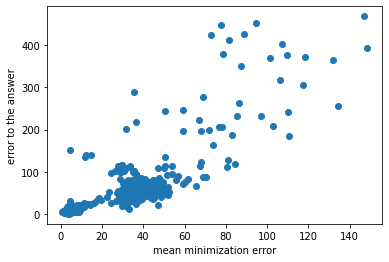

In [6]:
# multilateration with every patterns
from tqdm import tqdm

errors_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    errors_array.append(np.sqrt(errors**2))
    return np.sum(errors**2)

# Constraint function to ensure the estimated location has the same altitude as the wanted location
def altitude_constraint(xyz_receiver_estimated, altitude):
    lat, lon, alt = to_gps(*xyz_receiver_estimated)
    x, y, z = to_cartesian(lat, lon, altitude)
    return xyz_receiver_estimated[2] - z

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

xyz_receiver_estimated_list = []
receiver_locations_estimated = []
error_answer_minimization = []

for i in tqdm(range(len(d_iter))):

    source_locations = source_locations_iter[i]
    distance = d_iter[i]

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, distance), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
    xyz_receiver_estimated = result.x
    xyz_receiver_estimated_list.append(xyz_receiver_estimated)

    error_answer = np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated)
    error_answer_2d = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2])))
    error_answer_minimization.append([np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d])
    
    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)
    receiver_locations_estimated.append(receiver_location_estimated)

    # print('Receiver location:', xyz_receiver_estimated)
    # print('Receiver location:', receiver_location_estimated)
    # print('error', np.sum(errors_array[-1]))

print(error_answer_minimization)
error_answer_minimization.sort(key=lambda item: item[0])
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error")
plt.ylabel("error to the answer")
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

for i in range(len(receiver_locations_estimated)):
# Plot the estimated location of the receiver
    folium.Marker(location=receiver_locations_estimated[i][:2], icon=folium.Icon(color='purple'), tooltip=f'Point {i}').add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



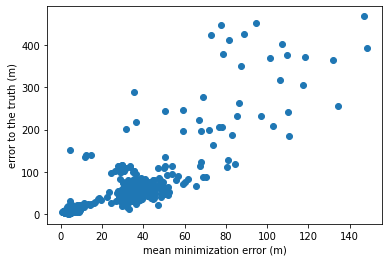

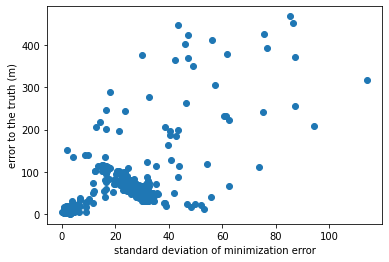

[]
[[5.584916054257652, 5.846616929811784, 5.384393986786299, 6.371365560031289, 6.262301572371055, 6.36785897391121, 6.812569313932224, 1.9458753285586952, 1.5441362332403659, 5.348142533579804, 2.056622337626049, 6.327312804902714, 6.552192051956164, 8.5345904690629, 8.595169050100237, 5.486577338045297, 6.038076712513789, 8.877267007339805, 3.328053373495323, 5.705412969422985, 2.8250702300752155, 4.265523426757962, 10.26684507032499, 4.015654715097237, 4.981843907700236, 5.461073183224382, 17.52225481545571, 6.704441865962892, 7.463892508001942, 6.506651840940261, 1.7640683727638136, 1.833793962723974, 7.952233899332819, 5.697551938856382, 2.5946399170034526, 19.42499003689051, 3.0041147096342984, 4.354359214309596, 6.243159273566471, 5.778868031405575, 3.881502966398458, 5.4642085544859675, 3.4569192500072847, 3.687535380255005, 4.133770154716384, 7.701986853951952, 2.92558730389921, 5.8149133042622125, 7.73316185543862, 6.838597413916812, 2.924083516593032, 14.880007089495212, 14

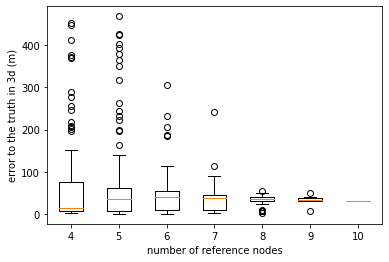

[]
[[7.699871008353395, 5.605250042965615, 3.3531243460052047, 84.86580222400586, 246.70612184672567, 6.702600035544496, 65.88013534397783, 5.346673461571499, 5.695986808038717, 5.845011018018796, 2.8709777625136854, 5.777280595383108, 4.127512889993243, 5.459573081332355, 6.1650939524166954, 7.461842077694066, 6.369615530035355, 2.9232802183437196, 6.8106980171712435, 6.0364181502401335, 3.24231922862753, 6.550392281094379, 4.353163035688611, 6.2605814141010105, 4.04126112229564, 50.68823506470747, 14.728853855635707, 447.24829360632356, 2.593927131384876, 4.980475393709055, 2.8124027237622267, 5.813315958065903, 3.8804367458307585, 5.485070261419783, 37.87507503015502, 10.656838947782159, 8.874828319005758, 5.583381993259822, 3.003289430878392, 8.071367197173943, 49.98809785127389, 13.738517247463044, 1.5437120933740327, 7.731037423276456, 6.2414441659074384, 4.014551704038684, 1.9453408371089893, 1.8790163871211203, 4.220585825638868, 3.6865224432281836, 2.056057416841492, 19.359890

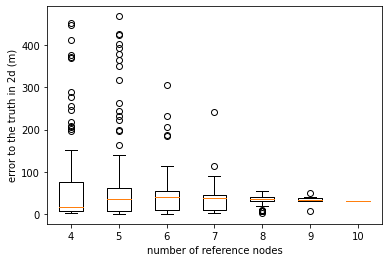

[]
[[0.7823898029711813, 0.8836170895519899, 1.0596017119575833, 1.118203121667129, 1.4209063174156569, 1.6155912425744319, 1.7575804065404768, 1.85167798544461, 1.8523686058779916, 1.9000386148144344, 1.9294469985543614, 1.9401264345880023, 1.9463168133524746, 2.011183090083861, 2.0180603222233913, 2.056197235968675, 2.1765027801595878, 2.539305857239654, 2.539575484002917, 2.565911581924702, 2.588406337343045, 2.7239809284432965, 2.864477633864851, 2.873244401772503, 2.895293589574422, 3.047901018927732, 3.2031929601182725, 3.2337355333063798, 3.2871310859160303, 3.2903112726004196, 3.2940357872306194, 3.3359143149366233, 3.3733424855620058, 3.3918685899071974, 3.4396911809666904, 3.503800287848904, 3.541117768601893, 3.559951554311688, 3.581882775495977, 3.657173820708252, 3.7296772308106227, 3.7865413566208233, 3.814565041399568, 3.8183424563544293, 3.9413111873413555, 3.9904672490525925, 4.023809671695339, 4.054318764243021, 4.1195227075806855, 4.132290297698113, 4.137570524584412

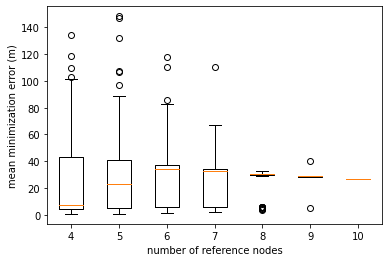

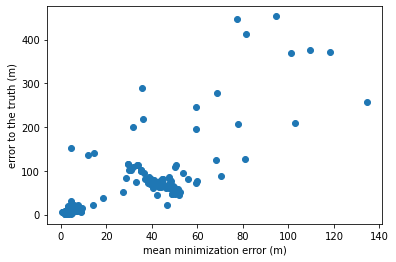

In [7]:
# visualization of multilateration with every pattern
# the relation between error to the truth and mean minimization error, number of reference nodes
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("standard deviation of minimization error")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][1])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 3d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][0])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("mean minimization error (m)")
plt.show()


error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization if item[2]==4], [item[1] for item in error_answer_minimization if item[2]==4])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")  
plt.show()

In [8]:
error_answer_minimization[-1]

[148.1717362405486, 391.8375274990166, 5, 76.66269957594444, 43.6726990301474]

In [9]:
# [np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d]
for i in range(len(error_answer_minimization)):
    if error_answer_minimization[i][0] < 3:
        print(error_answer_minimization[i])

[0.7823898029711813, 5.584916054257652, 4, 0.30842285169067396, 7.699871008353395]
[0.8836170895519899, 5.846616929811784, 4, 0.16888135367638332, 5.605250042965615]
[0.914163241403827, 5.179541275715626, 5, 0.5007812536711027, 3.794109943989119]
[1.0596017119575833, 5.384393986786299, 4, 0.44368335562081146, 3.3531243460052047]
[1.118203121667129, 6.371365560031289, 4, 1.0607747703570871, 84.86580222400586]
[1.3797538710000992, 6.780597808021972, 5, 0.9043410579284784, 7.6083999431325635]
[1.4209063174156569, 6.262301572371055, 4, 1.131599167828721, 246.70612184672567]
[1.6155912425744319, 6.36785897391121, 4, 0.826118887225674, 6.702600035544496]
[1.6471209995638862, 6.044040080105173, 6, 1.142913113693066, 5.308414325964696]
[1.6482784435729854, 5.467661980788372, 5, 1.356347615094852, 4.535885996026392]
[1.7575804065404768, 6.812569313932224, 4, 1.4112196968019153, 65.88013534397783]
[1.7611670997204727, 7.796855884432329, 5, 1.274456584901859, 5.150533238186275]
[1.762663854952399

[]
[[7.699871008353395, 5.605250042965615, 3.3531243460052047, 84.86580222400586, 246.70612184672567, 6.702600035544496, 65.88013534397783, 5.346673461571499, 5.695986808038717, 5.845011018018796, 2.8709777625136854, 5.777280595383108, 4.127512889993243, 5.459573081332355, 6.1650939524166954, 7.461842077694066, 6.369615530035355, 2.9232802183437196, 6.8106980171712435, 6.0364181502401335, 3.24231922862753, 6.550392281094379, 4.353163035688611, 6.2605814141010105, 4.04126112229564, 50.68823506470747, 14.728853855635707, 447.24829360632356, 2.593927131384876, 4.980475393709055, 2.8124027237622267, 5.813315958065903, 3.8804367458307585, 5.485070261419783, 37.87507503015502, 10.656838947782159, 8.874828319005758, 5.583381993259822, 3.003289430878392, 8.071367197173943, 49.98809785127389, 13.738517247463044, 1.5437120933740327, 7.731037423276456, 6.2414441659074384, 4.014551704038684, 1.9453408371089893, 1.8790163871211203, 4.220585825638868, 3.6865224432281836, 2.056057416841492, 19.359890

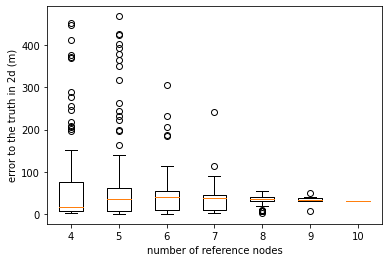

In [10]:
plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()